In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from wordcloud import WordCloud, STOPWORDS

import config

# py.init_notebook_mode(connected=True)
with open(config.stopwords_path, encoding='utf-8') as f:
    for line in f:
        STOPWORDS.add(line.strip())
print("stopwrod size:", len(STOPWORDS))

stopwrod size: 2085


In [5]:
df_data = pd.read_pickle(config.data_file_path)
print('df_data.shape: ', df_data.shape)
df_data.head()

df_data.shape:  (66436, 4)


,id,text,label,type
0,09766d6ec92a9eff7f8763f9f9fee14f,＂李的76人律师团领队、法律大学副校长张爱国教授对媒体表示，李天一因第一个与被害女子发生性关...,1,train
1,1cdf439752d339b45fc848984c609899,【男子捏造“周浦滴滴司机砍死乘客”谣言被刑拘称只是觉得好玩】,0,train
2,d3aa07cc41ab42fa5c8718bd655abb1c,【善良的大桥】金沙江大桥在没车行走的时候自我坍塌，这桥通人性，未伤一车一人，太善良了。应该当...,1,train
3,e940e98292b76024dfbcbcff378c9d2f,幼儿园都发通知了，家长们注意啦：现在得白血病的小孩越来越多，妇幼保健院提示您，请不要给宝宝喝...,1,train
4,21b667ed6784407bf5562a400c72bb3f,上海4000吨垃圾偷倒苏州太湖西山岛(图)（分享自@新浪新闻）,0,train


In [7]:
df_data.tail()

,id,text,label,type
3995,84716d630cfcc5011fc9fdcd835dbdfc,【美国一父亲疑故意遗留儿子在车里热死，被判终身监禁】2014年，美国一位父亲将22月大儿子留...,0,test
3996,7b339890a580a8871ab68d9ba0e7ec4c,（百兴厂旁边泛亚科技）礼嘉工业区一工厂毒气泄露，目测嗅测是二氯二乙硫醚（俗称芥子气，日本二战...,0,test
3997,615dd471f4dc1bf51d9afdf6ca58a83e,【财经政券】1）中财办主任刘鹤调研3省市，释放中央供给侧改革决心；2）人民币中间价逼近6.7...,0,test
3998,2413169d0e12069008fd8f047ecef83b,当年那道光长野博(真角大古）20134.25因车祸去世了，童年里的那位英雄那道光。,0,test
3999,2c31d5d4f8a476caa04fa5edf66b6a7a,最近驻马店市正阳县汝南埠镇的几个村村民都在传有人青天白日公然抢夺小孩，挖小孩肾脏，大家都人心...,0,test


In [9]:
df_all = pd.read_pickle(config.ngram_feature_path)
print('df_all.shape: ', df_all.shape)

df_all.shape:  (68971, 8)


In [10]:
df_all.head()

,id,text,label,type,text_unigram,text_bigram,text_trigram,text_unigram_str
0,09766d6ec92a9eff7f8763f9f9fee14f,＂李的76人律师团领队、法律大学副校长张爱国教授对媒体表示，李天一因第一个与被害女子发生性关...,1,train,"[＂, 李, 的, 76, 人, 律师团, 领队, 、, 法律, 大学, 副校长, 张, 爱...","[＂_李, 李_的, 的_76, 76_人, 人_律师团, 律师团_领队, 领队_、, 、_...","[＂_李_的, 李_的_76, 的_76_人, 76_人_律师团, 人_律师团_领队, 律师...",＂ 李 的 76 人 律师团 领队 、 法律 大学 副校长 张 爱国 教授 对 媒体 表示 ...
1,1cdf439752d339b45fc848984c609899,【男子捏造“周浦滴滴司机砍死乘客”谣言被刑拘称只是觉得好玩】,0,train,"[【, 男子, 捏造, “, 周浦, 滴滴, 司机, 砍死, 乘客, ”, 谣言, 被, 刑...","[【_男子, 男子_捏造, 捏造_“, “_周浦, 周浦_滴滴, 滴滴_司机, 司机_砍死,...","[【_男子_捏造, 男子_捏造_“, 捏造_“_周浦, “_周浦_滴滴, 周浦_滴滴_司机,...",【 男子 捏造 “ 周浦 滴滴 司机 砍死 乘客 ” 谣言 被 刑拘 称 只是 觉得 好玩 】
2,d3aa07cc41ab42fa5c8718bd655abb1c,【善良的大桥】金沙江大桥在没车行走的时候自我坍塌，这桥通人性，未伤一车一人，太善良了。应该当...,1,train,"[【, 善良, 的, 大桥, 】, 金沙江, 大桥, 在, 没车, 行走, 的, 时候, 自...","[【_善良, 善良_的, 的_大桥, 大桥_】, 】_金沙江, 金沙江_大桥, 大桥_在, ...","[【_善良_的, 善良_的_大桥, 的_大桥_】, 大桥_】_金沙江, 】_金沙江_大桥, ...",【 善良 的 大桥 】 金沙江 大桥 在 没车 行走 的 时候 自我 坍塌 ， 这桥通 人性...
3,e940e98292b76024dfbcbcff378c9d2f,幼儿园都发通知了，家长们注意啦：现在得白血病的小孩越来越多，妇幼保健院提示您，请不要给宝宝喝...,1,train,"[幼儿园, 都, 发, 通知, 了, ，, 家长, 们, 注意, 啦, ：, 现在, 得, ...","[幼儿园_都, 都_发, 发_通知, 通知_了, 了_，, ，_家长, 家长_们, 们_注意...","[幼儿园_都_发, 都_发_通知, 发_通知_了, 通知_了_，, 了_，_家长, ，_家长...",幼儿园 都 发 通知 了 ， 家长 们 注意 啦 ： 现在 得 白血病 的 小孩 越来越 多...
4,21b667ed6784407bf5562a400c72bb3f,上海4000吨垃圾偷倒苏州太湖西山岛(图)（分享自@新浪新闻）,0,train,"[上海, 4000, 吨, 垃圾, 偷倒, 苏州, 太湖, 西山, 岛, (, 图, ), ...","[上海_4000, 4000_吨, 吨_垃圾, 垃圾_偷倒, 偷倒_苏州, 苏州_太湖, 太...","[上海_4000_吨, 4000_吨_垃圾, 吨_垃圾_偷倒, 垃圾_偷倒_苏州, 偷倒_苏...",上海 4000 吨 垃圾 偷倒 苏州 太湖 西山 岛 ( 图 ) （ 分享 自 @ 新浪 新闻 ）


In [11]:
df_all['text_length'] = df_all['text'].str.len()

In [12]:
df_tr = df_all.loc[df_all['type'] == 'train']
df_te = df_all.loc[df_all['type'] == 'test']
print('df_tr.shape: ', df_tr.shape)

df_tr.shape:  (64971, 9)


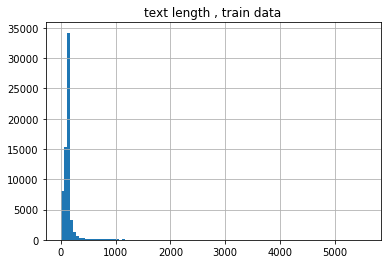

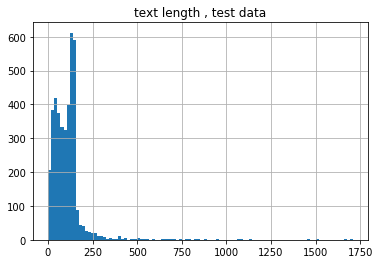

In [13]:
df_tr['text_length'].hist(bins=100)
plt.title('text length , train data')
plt.show()

df_te['text_length'].hist(bins=100)
plt.title('text length , test data')
plt.show()

In [14]:
# check the class distribution for the author label in train
print(df_tr['label'].value_counts())

1    48834
0    16137
Name: label, dtype: int64


                                 id                            text  label  \
1  1cdf439752d339b45fc848984c609899  【男子捏造“周浦滴滴司机砍死乘客”谣言被刑拘称只是觉得好玩】      0   

    type                                       text_unigram  \
1  train  [【, 男子, 捏造, “, 周浦, 滴滴, 司机, 砍死, 乘客, ”, 谣言, 被, 刑...   

                                         text_bigram  \
1  [【_男子, 男子_捏造, 捏造_“, “_周浦, 周浦_滴滴, 滴滴_司机, 司机_砍死,...   

                                        text_trigram  \
1  [【_男子_捏造, 男子_捏造_“, 捏造_“_周浦, “_周浦_滴滴, 周浦_滴滴_司机,...   

                                  text_unigram_str  text_length  
1  【 男子 捏造 “ 周浦 滴滴 司机 砍死 乘客 ” 谣言 被 刑拘 称 只是 觉得 好玩 】         30.0  
count    16137.000000
mean       105.744810
std         50.561231
min          3.000000
25%         62.000000
50%        111.000000
75%        140.000000
max        299.000000
Name: text_length, dtype: float64


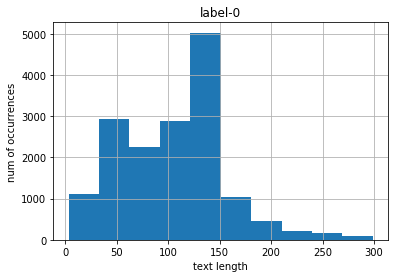

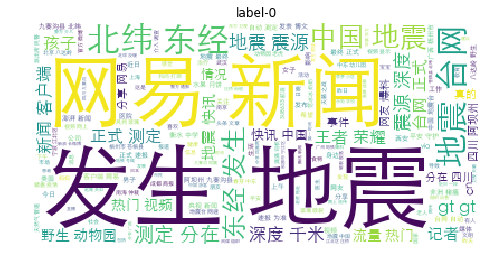

                                 id  \
0  09766d6ec92a9eff7f8763f9f9fee14f   

                                                text  label   type  \
0  ＂李的76人律师团领队、法律大学副校长张爱国教授对媒体表示，李天一因第一个与被害女子发生性关...      1  train   

                                        text_unigram  \
0  [＂, 李, 的, 76, 人, 律师团, 领队, 、, 法律, 大学, 副校长, 张, 爱...   

                                         text_bigram  \
0  [＂_李, 李_的, 的_76, 76_人, 人_律师团, 律师团_领队, 领队_、, 、_...   

                                        text_trigram  \
0  [＂_李_的, 李_的_76, 的_76_人, 76_人_律师团, 人_律师团_领队, 律师...   

                                    text_unigram_str  text_length  
0  ＂ 李 的 76 人 律师团 领队 、 法律 大学 副校长 张 爱国 教授 对 媒体 表示 ...        112.0  
count    48833.000000
mean       163.812750
std        235.735387
min          2.000000
25%        103.000000
50%        135.000000
75%        146.000000
max       5555.000000
Name: text_length, dtype: float64


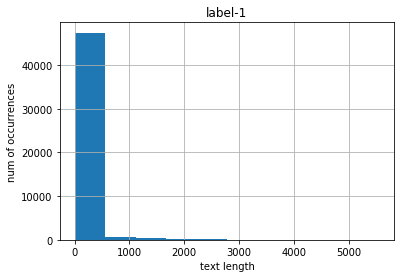

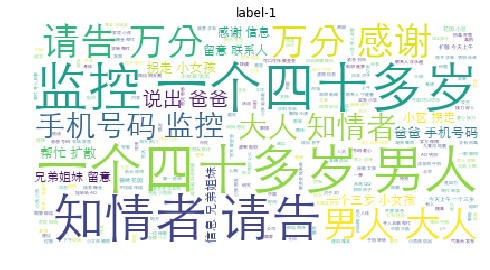

In [16]:
for lbl in [0, 1]:
    df_tr_label = df_tr.loc[df_tr['label'] == lbl]
    print(df_tr_label.iloc[:1])
    label_len = df_tr_label['text_length']
    print(label_len.describe())
    plt.figure()
    label_len.hist()
    plt.title('label-' + str(lbl))
    plt.xlabel('text length')
    plt.ylabel('num of occurrences')
    plt.show()
    
    text = ''
    for i in df_tr_label['text_unigram_str']:
        text += i
    wc = WordCloud(background_color='white',  # 设置背景颜色
                   stopwords=STOPWORDS,  # 设置停用词
                   font_path='/System/Library/Fonts/STHeiti Light.ttc',
                   )
    wc.generate(text)
    plt.figure(figsize=(8, 6))
    plt.imshow(wc)
    plt.title('label-' + str(lbl))
    plt.axis('off')
    plt.show()

In [17]:
print(df_tr.label.value_counts())

1    48834
0    16137
Name: label, dtype: int64
